# Set up

DCA is an algorithm designed to solve DC functions - functions that can be written as

$$ f(x) = g(x) - h(x), \forall x \in \mathbb{R}^n $$
where $g, h : \mathbb{R}^n \xrightarrow{} \mathbb{R}$ are convex functions.

We are interested in the following problem:
$$\begin{align*}
\text{minimize}_{x\in\mathbb{R}^n} & f_0(x) \\
\text{subject to} & f_i(x) \leq 0, i=1,...,m.
\end{align*}$$

Let's try to maximize $f(x) = \frac{1}{2}x^2$ on the interval $[-1, 2]$. The obvious solution is $x^*=2$. Notice that we can decompose the function $f(x) = g(x) - h(x)$ where $I_{[-1,2]}$ the indicator function which is 0 on the interval $[-1, 2]$ and $\infty$ elsewhere and $h(x) = \frac{1}{2}x^2$.

We will work on the whole real line $\mathbb{R}$ and from the MIT paper we can see that

1. $\sup \{f(x): x \in C\}, f, C$ convex (in this case $C = [-1,2]$ which is convex)
2. $\inf \{g(x) - h(x): x \in \mathbb{R}\}, g, h$ convex

are equivalent formulations of the DC program. The formulations are then

1. $\sup \{\frac{1}{2}x^2: x \in [-1, 2]\}$
2. $\inf \{I_{[-1, 2]}(x) - \frac{1}{2}x^2: x \in \mathbb{R}\}$

Furthermore, we will utilize conjugate functions - the conjugate function of $g(x)$ is given by
$$g^*(y) = \sup\{xy - g(x): x \in \mathbb{R}\}.$$

Luckily (or purposebly because I chose an easy function to maximize), the conjugate function of $h(x) = \frac{1}{2}x^2$ has an analytic solution and is $h^*(y) = -\frac{1}{2}y^2$. The conjugate function of $g(x)$ is $g^*(y) = -y$ for $y\leq 0$ and $g^*(y) = 2y$ for $y > 0$.

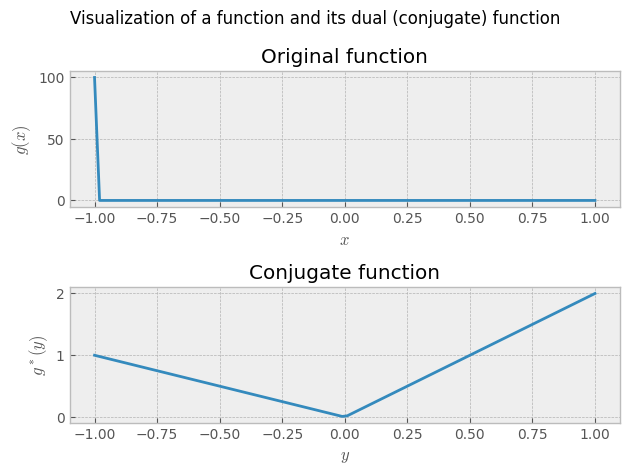

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("bmh")
from scipy.optimize import minimize_scalar

def f(x):
    if isinstance(x, np.ndarray):
        mask = (x > -1) & (x < 2)
        output = x.copy()
        output[mask] = 0
        output[~mask] = 100
        return output
    if x > -1 and x < 2:
        return 0
    return 100

xs = np.linspace(-1, 1, 100)
fxs = f(xs)

ys = np.linspace(-1, 1, 100)
fys = np.zeros(len(ys))

for i, y in enumerate(ys):
    def opt_func(x):
        return -x*y + f(x)
    opt_y = minimize_scalar(opt_func).fun
    fys[i] = -opt_y

fig, ax = plt.subplots(nrows=2)

ax[0].plot(xs, fxs)
ax[0].set_title("Original function")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$g(x)$")
ax[1].plot(ys, fys)
ax[1].set_title("Conjugate function")
ax[1].set_xlabel("$y$")
ax[1].set_ylabel("$g^*(y)$")
plt.suptitle("Visualization of a function and its dual (conjugate) function")
plt.tight_layout()
plt.show()

Finally, we will utilize the concept of subgradients. We define an $\epsilon$-subgradient of g at $x^0$ to be

$$ \partial_\epsilon g(x^0) = \{y \in \mathbb{R}^n: g(x) - g(x^0) \geq (x - x^0)^T y - \epsilon \hspace{0.2cm} \forall x \in \mathbb{R}^n \}. $$

We define a differential of g at $x^0$ to be

$$ \partial g(x^0) = \bigcap_{\epsilon > 0} \partial_\epsilon g(x^0). $$

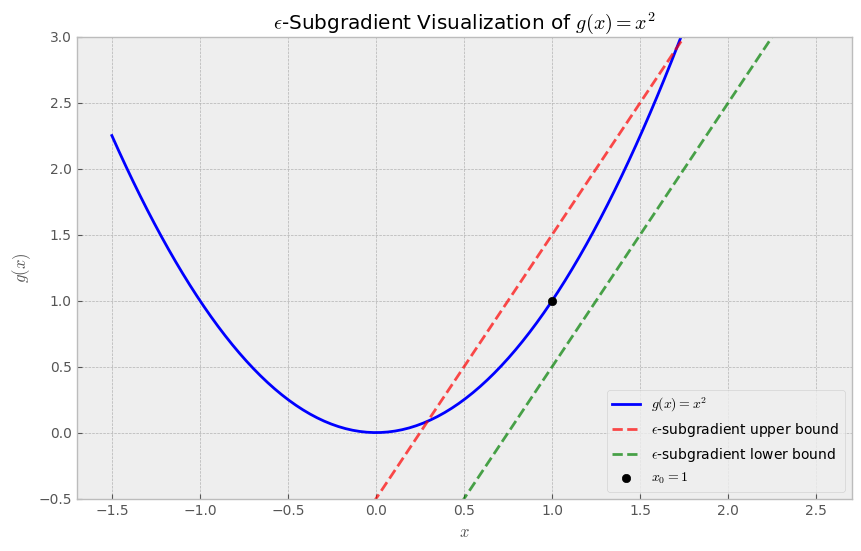

In [8]:
# Define the function and its subgradients
def g(x):
    return x**2

def g_prime(x):
    return 2 * x  # Derivative of g(x) = x^2

# Function parameters
x0 = 1          # Point at which we compute the epsilon subgradient
epsilon = 0.5   # Allowed epsilon deviation
slope = g_prime(x0)  # Slope of the subgradient at x0

# Define x range for plotting
x = np.linspace(-1.5, 2.5, 200)
y = g(x)

# Calculate the y-values for the epsilon subgradient bounds
upper_line = g(x0) + slope * (x - x0) + epsilon
lower_line = g(x0) + slope * (x - x0) - epsilon

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$g(x) = x^2$', color='blue', linewidth=2)
plt.plot(x, upper_line, '--', label=r'$\epsilon$-subgradient upper bound', color='red', alpha=0.7)
plt.plot(x, lower_line, '--', label=r'$\epsilon$-subgradient lower bound', color='green', alpha=0.7)
plt.scatter([x0], [g(x0)], color='black', zorder=5, label=r'$x_0 = 1$')
plt.title(r'$\epsilon$-Subgradient Visualization of $g(x) = x^2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 3)

# Show the plot
plt.show()


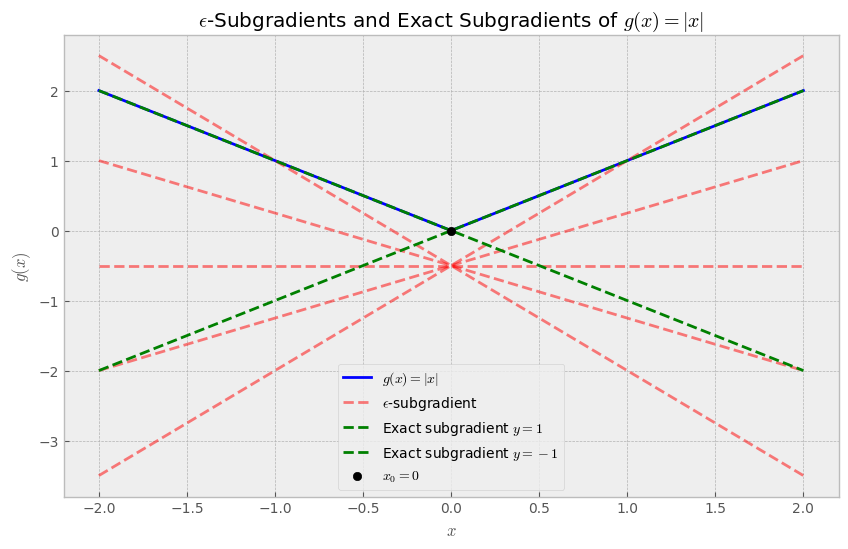

In [10]:
# Define the convex function and point of interest
def g(x):
    return np.abs(x)

x0 = 0  # Point at which we examine the subgradients
epsilon = 0.5  # Slack for epsilon-subgradient

# Define the range for x and compute g(x)
x = np.linspace(-2, 2, 200)
y = g(x)

# Define epsilon-subgradients for different slopes within tolerance
slopes = np.linspace(-1 - epsilon, 1 + epsilon, 5)  # Slopes within epsilon-subgradient range

# Plot the function and epsilon-subgradients
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$g(x) = |x|$', color='blue', linewidth=2)
for slope in slopes:
    plt.plot(x, g(x0) + slope * (x - x0) - epsilon, '--', color='red', alpha=0.5, label=r'$\epsilon$-subgradient' if slope == slopes[0] else "")

# Plot exact subgradients (supporting lines within the subdifferential)
plt.plot(x, g(x0) + 1 * (x - x0), '--', color='green', label=r'Exact subgradient $y=1$')
plt.plot(x, g(x0) - 1 * (x - x0), '--', color='green', label=r'Exact subgradient $y=-1$')

# Mark x0 on the plot
plt.scatter([x0], [g(x0)], color='black', zorder=5, label=r'$x_0 = 0$')
plt.title(r'$\epsilon$-Subgradients and Exact Subgradients of $g(x) = |x|$')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


To recap, we want to do the following.

Maximize $f(x) = \frac{1}{2}x^2$ on the interval $[-1, 2]$. To do this, we will minimize $g(x) - h(x)$ where $g(x) = I_{[-1, 2]}$ and $h(x) = \frac{1}{2}x^2$.

Here is the algorithm, called Difference of Convexe Algorithm (DCA):

1. Choose $x_0 \in \text{dom} \hspace{0.1cm} {g}$
2. For $k \in \mathbb{N}$ do:
3.   choose $y_k \in \partial h(x_k)$
4.   choose $x_{k+1} \in \partial g^*(y_k)$
5.   if $\min \{|(x_{k+1} - x_l)_i|, |\frac{(x_{k+1} - x_l)_i}{(x_k)_i}| \} \leq \delta$:
6.    then return $x_{k+1}$

To execute the algorithm we need to be able to calculate the differential of $h(x)$ at $x_k$. Luckily, since our function $h$ is differentiable this will simply be $\partial h(x_k) = x_k$. 

Furhtermore, we need to be able to calculate the differential of $g^*$. $g^*$ is $-y$ for $y < 0$, $2y$ for $y > 0$, and any value in the interval $[-1, 2]$ for $y = 0$. The exact differential is then $\partial g^*(y_k) = -1$ for $y<0$, $[-1,2]$ for $y=0$, and $2$ for $y > 0$.

With these things in place, we can execute the algorithm.

In [ ]:
x0 = -1
delta = 1e-2

def sub_h(x_k):
    return x_k

def sub_g_star(y_k):
    if y_k < 0:
        return -1
    if y_k > 0:
        return 2
    else:
        return np.random.uniform(-1, 2)

In [25]:
def h(x):
    """The function h(x) = 1/2 * x^2."""
    return 0.5 * x**2

def grad_h(x):
    """The gradient (subgradient) of h(x) = 1/2 * x^2."""
    return x  # Since h(x) is differentiable, grad_h(x) is just x

def g_star(y):
    """The conjugate function g*(y) for the indicator function I_{[-1, 2]}."""
    if y > 0:
        return 2
    elif y < 0:
        return -1
    else:
        return np.random.uniform(-1, 2)  # Any value in [-1, 2] for y = 0

def difference_of_convex_algorithm(x0, tol=1e-6, max_iter=100):
    """
    Implements the Difference of Convex Algorithm (DCA) to maximize f(x) = 1/2 * x^2
    on the interval [-1, 2].
    
    Parameters:
    - x0: Initial value within the domain [-1, 2]
    - tol: Tolerance for the stopping criterion
    - max_iter: Maximum number of iterations
    
    Returns:
    - x: The point that approximately maximizes f(x) on [-1, 2]
    - history: List of x values at each iteration (for debugging and visualization)
    """
    x = x0
    history = [x]
    
    for k in range(max_iter):
        y = grad_h(x)  # Step 3: Choose y_k in ∂h(x_k)
        x_next = g_star(y)  # Step 4: Choose x_{k+1} in ∂g*(y_k)
        
        # Step 5: Check stopping criterion
        if np.allclose(x, x_next, rtol=tol, atol=tol):
            print(f"Converged after {k+1} iterations.")
            break
        
        x = x_next
        history.append(x)
    else:
        print("Max iterations reached without convergence.")
    
    return x, history

# Initial guess x0 within the interval [-1, 2]
x0 = 0

# Run the DCA algorithm
optimal_x, history = difference_of_convex_algorithm(x0)

print(f"Approximate maximum at x = {optimal_x}")
print("History of x values:", history)


Converged after 3 iterations.
Approximate maximum at x = 2
History of x values: [0, 0.33455383591826693, 2]


Converged after 3 iterations.


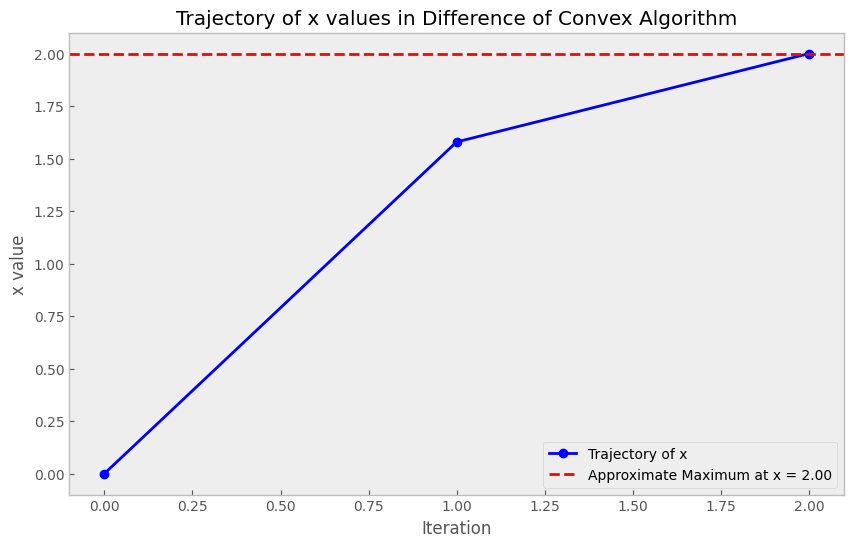

In [26]:
# Run the DCA algorithm
optimal_x, history = difference_of_convex_algorithm(x0=0.0)

# Plot the trajectory of x values
plt.figure(figsize=(10, 6))
plt.plot(history, marker='o', linestyle='-', color='b', label="Trajectory of x")
plt.axhline(optimal_x, color='r', linestyle='--', label=f"Approximate Maximum at x = {optimal_x:.2f}")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Trajectory of x values in Difference of Convex Algorithm")
plt.legend()
plt.grid()
plt.show()

Converged after 2 iterations.


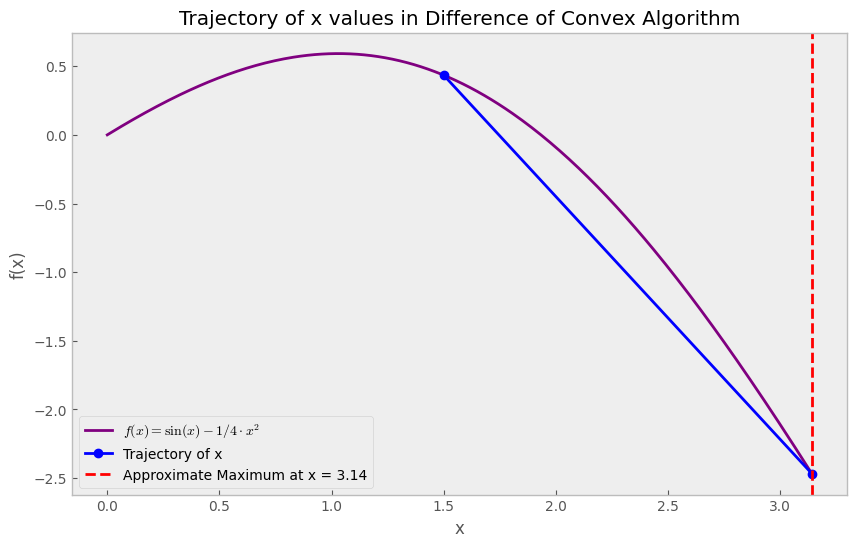

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """The objective function to maximize: f(x) = sin(x) - 1/4 * x^2."""
    return np.sin(x) - 0.25 * x**2

def h(x):
    """The function h(x) = 1/4 * x^2 - sin(x)."""
    return 0.25 * x**2 - np.sin(x)

def grad_h(x):
    """The gradient (subgradient) of h(x)."""
    return 0.5 * x - np.cos(x)

def g_star(y):
    """The conjugate function g*(y) for the indicator function I_{[0, pi]}."""
    if y > 0:
        return np.pi
    elif y < 0:
        return 0
    else:
        return np.random.uniform(0, np.pi)  # Any value in [0, pi] when y = 0

def difference_of_convex_algorithm(x0, tol=1e-6, max_iter=100):
    """
    Implements DCA to maximize f(x) = sin(x) - 1/4 * x^2 on the interval [0, pi].
    
    Parameters:
    - x0: Initial value within the domain [0, pi]
    - tol: Tolerance for the stopping criterion
    - max_iter: Maximum number of iterations
    
    Returns:
    - x: The point that approximately maximizes f(x) on [0, pi]
    - history: List of x values at each iteration (for visualization)
    """
    x = x0
    history = [x]
    
    for k in range(max_iter):
        y = grad_h(x)  # Compute subgradient of h(x) at x_k
        x_next = g_star(y)  # Update x_{k+1} based on g* conjugate

        # Check stopping criterion
        if np.allclose(x, x_next, rtol=tol, atol=tol):
            print(f"Converged after {k+1} iterations.")
            break
        
        x = x_next
        history.append(x)
    else:
        print("Max iterations reached without convergence.")
    
    return x, history

# Initial guess x0 within the interval [0, pi]
x0 = 1.5

# Run the DCA algorithm
optimal_x, history = difference_of_convex_algorithm(x0)

# Plot the function and the trajectory
x_vals = np.linspace(0, np.pi, 300)
f_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label=r"$f(x) = \sin(x) - 1/4 \cdot x^2$", color="purple")
plt.plot(history, f(np.array(history)), 'bo-', label="Trajectory of x")
plt.axvline(optimal_x, color='r', linestyle='--', label=f"Approximate Maximum at x = {optimal_x:.2f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Trajectory of x values in Difference of Convex Algorithm")
plt.legend()
plt.grid()
plt.show()


# Application to differential privacy

The true aim of this algorithm is to utilize it within differential privacy. Here we are interested in maximizing the Fisher information over the set of $\epsilon$-private matrices $Q_\epsilon$. Given a single parameter data collection model, $p_\theta(x)$, and a privatization matrix $Q$, the Fisher information is defined as 

$$ FI_\theta(Q) = \sum_{y \in Y} \frac{(\sum_{x\in X}Q(y|x) \dot{p}_\theta (x))^2}{\sum_{x \in X} Q(y|x)p_\theta (x)}.$$

We are optimizing over the set $D_\epsilon$ - the set of $\epsilon$ differentially private matrices. Such matrices satisfy $Q(y|x) \leq e^\epsilon Q(y|x') \hspace{0.2cm} \forall (y, x, x') \in Y \times X^2$.

Defining an indicator function as $g(Q) = ID_{D_\epsilon}(Q)$ and letting $h(x) = FI_\theta(Q)$ be the Fisher information, we have the following problem

$$ \inf \{I_{D_\epsilon}(Q) - FI_\theta(Q) : Q \in \mathbb{R}^n\}. $$

To apply the DCA algorithm, we will need the subdifferential of $FI_\theta(Q)$ at $Q_k$. Luckily, more patient people already performed the calculation for us and got

$$\nabla FI_\theta(Q)|_{x,y} = \frac{2\dot{p}_\theta(x)\sum_{x\in X} Q(y|x)\dot{p}_\theta(x)}{\sum_{x\in X}Q(y|x)p_\theta (x)} - \frac{p_\theta (x) (\sum_{x\in X} Q(y|x) \dot{p}_\theta (x))^2}{(\sum_{x\in X} Q(y|x) p_\theta (x))^2}.$$

The total subdifferential will be a $|X|\cdot |Y|$ vector (or matrix).

The conjugate function of $g(Q)$, $g^*(Y)$ can be written as

$$ g^*(Y) = \sup \{Q^TY - g(Q): Q \in \mathbb{R}^{|X|\times|Y|}\} $$

which is equivalent to

$$ g^*(Y) = \sup_{Q\in D_\epsilon} \langle Y, Q\rangle.$$

Luckily, the subgradient of this dual function is

$$ \partial g^*(Y) = \argmax_{Q\in D_\epsilon} \langle Y, Q\rangle.$$

In [76]:
import numpy as np
from scipy.optimize import minimize

def fisher_gradient(p_theta, p_theta_dot, Q):
    nrows, ncols = Q.shape
    gradient_matrix = np.zeros(Q.shape)

    for i in range(nrows):
        Q_row = Q[i]

        for j in range(ncols):
            Q_ptheta_dot = Q_row @ p_theta_dot
            Q_ptheta = Q_row @ p_theta

            gradient_matrix[i][j] = 2*p_theta_dot[j]*Q_ptheta_dot/Q_ptheta - p_theta[j]*np.power(Q_ptheta_dot,2)/np.power(Q_ptheta, 2)
    
    return gradient_matrix


def indicator_subgradient(Y, epsilon):
    """
    Finds a subgradient of the conjugate function I_{M_epsilon}^*(Y) at Y
    using constrained optimization row by row.
    
    Parameters:
    Y : np.array
        Input matrix whose subgradient we want to calculate.
    epsilon : float
        Privacy parameter for the epsilon-private constraint.
    
    Returns:
    Q_star : np.array
        Matrix representing the subgradient of I_{M_epsilon}^*(Y) at Y.
    """
    n_rows, n_cols = Y.shape
    Q_star = np.zeros_like(Y)

    for i in range(n_rows):
        y_row = Y[i]
        
        # Objective function for row i: maximize sum(Y[i, j] * Q[i, j])
        # Since `minimize` minimizes, we negate the objective to maximize.
        def objective(Q_row):
            return -np.dot(y_row, Q_row)

        # Constraint: sum of Q[i, j] should be 1 (stochastic constraint)
        constraints = [{'type': 'eq', 'fun': lambda Q_row: np.sum(Q_row) - 1}]
        
        # Privacy constraints: e^(-epsilon) Q[j'] <= Q[j] <= e^(epsilon) Q[j']
        for j in range(n_cols):
            for j_prime in range(n_cols):
                if j != j_prime:
                    constraints.append({
                        'type': 'ineq',
                        'fun': lambda Q_row, j=j, j_prime=j_prime: Q_row[j] - np.exp(-epsilon) * Q_row[j_prime]
                    })
                    constraints.append({
                        'type': 'ineq',
                        'fun': lambda Q_row, j=j, j_prime=j_prime: np.exp(epsilon) * Q_row[j_prime] - Q_row[j]
                    })
        
        # Bounds: Q_row[j] >= 0 for all j
        bounds = [(0, 1) for _ in range(n_cols)]

        # Start with a nearly uniform distribution for stability
        Q_initial = np.ones(n_cols) / n_cols + np.random.uniform(-0.01, 0.01, n_cols)
        Q_initial = np.maximum(0, Q_initial)
        Q_initial /= np.sum(Q_initial)
        
        # Solve the optimization problem for the row
        result = minimize(objective, Q_initial, constraints=constraints, bounds=bounds, method='SLSQP')

        if result.success:
            Q_star[i] = result.x
        else:
            raise ValueError(f"Optimization failed for row {i}: {result.message}")

    return Q_star

In [77]:
from scipy.stats import binom
from scipy.special import comb

def DCA_single_param(q0, p_theta, p_theta_dot, epsilon, tol=1e-6, max_iter=100):
    q = q0
    history = [q]

    for k in range(max_iter):
        y = fisher_gradient(p_theta, p_theta_dot, q)
        q_next = indicator_subgradient(y, epsilon)

        if np.allclose(q, q_next, rtol=tol, atol=tol):
            print(f"Converged after {k+1} iterations.")
            break

        q = q_next
        history.append(q)
    else:
        print("Max iterations reached without convergence")
    
    return q, history

def binom_derivative(k, n, theta):
    if k > n:
        raise Exception("Can't have k > n")
    first = k*np.power(theta, k-1)*np.power(1-theta, n-k)
    second = (n-k)*np.power(1-theta, n-k-1)*np.power(theta, k)
    return comb(n, k) * (first - second)

# utility functions
def print_matrix(matrix):
    for i, row in enumerate(matrix):
        print(f"row {i}: " + '\t'.join(map(str, row)))

def reduce_optimal_matrix(matrix):
    nonzero_rows = list()
    for i in range(matrix.shape[1]):
        if np.all(matrix[:,i]):
            nonzero_rows.append(matrix[:,i])
    return np.array(nonzero_rows).T


## Bernoulli distribution test

In [78]:
N = 1
THETA = 0.5
EPSILON = 1.0

p_theta = binom.pmf(np.arange(N+1), N, THETA)
p_theta_dot = np.array([binom_derivative(i, N, THETA) for i in range(N+1)])

q0 = np.random.uniform(size=2)
q0 = np.array([q0, 1-q0])

opt_q, history = DCA_single_param(q0, p_theta, p_theta_dot, EPSILON)

Converged after 2 iterations.


In [79]:
print_matrix(opt_q)

row 0: 0.7310585783434629	0.2689414216565371
row 1: 0.26894142135909527	0.7310585786409047


Looks good!

## Binomial with two tries, $n=2, \epsilon = 1.0$

Two modes, one for $\theta < 0.5$ and another one for $\theta > 0.5$.

In [80]:
N = 2
THETA = 0.3
EPSILON = 1.0

p_theta = binom.pmf(np.arange(N+1), N, THETA)
p_theta_dot = np.array([binom_derivative(i, N, THETA) for i in range(N+1)])

# q0 = np.array([[1/(N+1) for _ in range(N+1)] for _ in range(N+1)])
q0 = np.random.uniform(size=(N+1, N+1))
for i in range(N+1):
    q0[i] = q0[i]/np.sum(q0[i])

opt_q, history = DCA_single_param(q0, p_theta, p_theta_dot, EPSILON)
print_matrix(opt_q)

Converged after 2 iterations.
row 0: 0.5761168846026984	0.2119415578795222	0.21194155751777938
row 1: 0.5761168842845119	0.2119415578577431	0.21194155785774502
row 2: 0.5761168847978216	0.2119415572682112	0.21194155793396724


In [81]:
N = 2
THETA = 0.7
EPSILON = 1.0

p_theta = binom.pmf(np.arange(N+1), N, THETA)
p_theta_dot = np.array([binom_derivative(i, N, THETA) for i in range(N+1)])

# q0 = np.array([[1/(N+1) for _ in range(N+1)] for _ in range(N+1)])
q0 = np.random.uniform(size=(N+1, N+1))
for i in range(N+1):
    q0[i] = q0[i]/np.sum(q0[i])

opt_q, history = DCA_single_param(q0, p_theta, p_theta_dot, EPSILON)
print_matrix(opt_q)

Converged after 2 iterations.
row 0: 0.42231879772183667	0.42231879851813237	0.15536240376003105
row 1: 0.21194155785842464	0.21194155785842678	0.5761168842831486
row 2: 0.4223187977374253	0.42231879851253806	0.15536240375003674


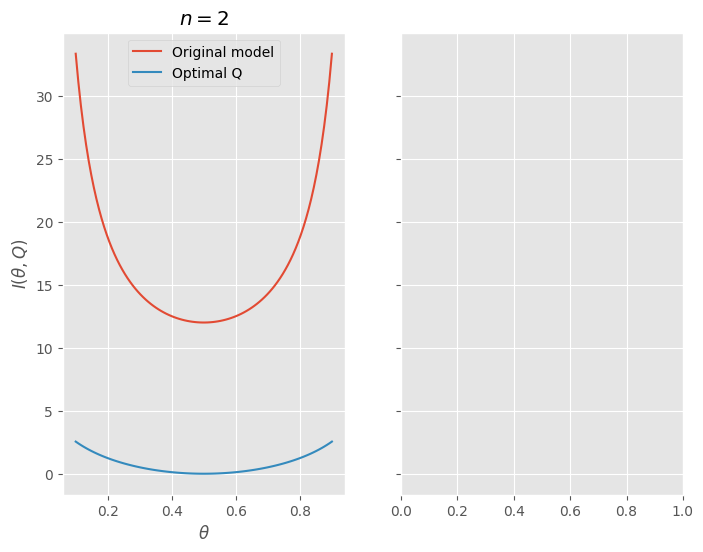

In [82]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")

def fisher_information_privatized(Q: np.ndarray, p_theta: np.ndarray, p_theta_dot: np.ndarray) -> float:
    numerator = np.power(Q.T@p_theta_dot, 2)
    denominator = Q.T@p_theta
    return np.sum(numerator / denominator)

def fisher_information_original(n: int, theta:float) -> float:
    return n / (theta*(1-theta))

EPSILON = 2.0
thetas = np.linspace(1e-1, 1-1e-1, 100) # exclude boundaries

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), sharey=True)

# n=3
orig_fisher_infs = fisher_information_original(n=3, theta=thetas)
privatized_opt_fisher_infs = list()
for theta in thetas:
    reduced_q_matrix = reduce_optimal_matrix(opt_q)
    p_theta = binom.pmf(np.arange(3), 2, theta)
    p_theta_dot = [binom_derivative(i, n=2, theta=theta) for i in range(3)]

    privatized_opt_fisher_infs.append(fisher_information_privatized(reduced_q_matrix, p_theta, p_theta_dot))

ax[0].plot(thetas, orig_fisher_infs, label="Original model")
ax[0].plot(thetas, privatized_opt_fisher_infs, label="Optimal Q")
ax[0].set_xlabel(r"$\theta$")
ax[0].set_ylabel(r"$I(\theta, Q)$")
ax[0].set_title("$n=2$")
ax[0].legend()

plt.show()